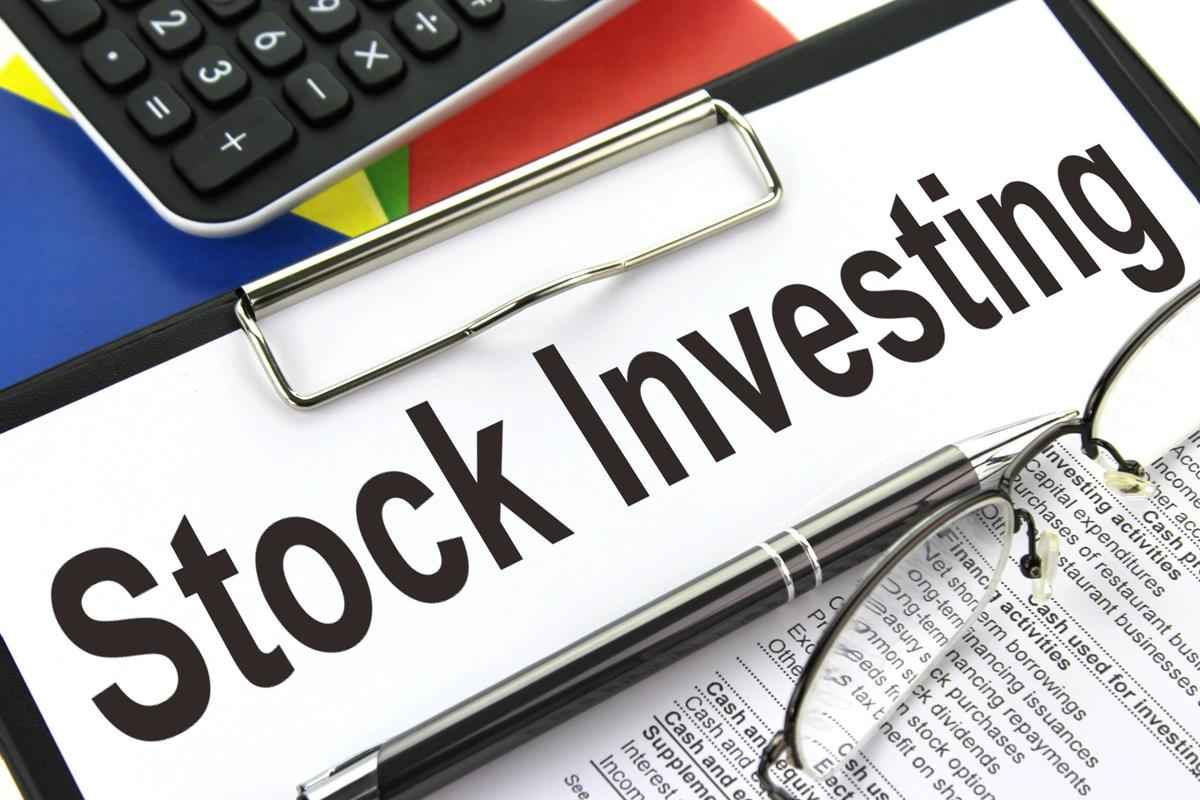

## Importing required libraries

In [1]:
# Importing required libraries
import requests
import warnings
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore') # Suppress warnings

## Indexes Selected amongst many others

In [2]:
# List of symbols to fetch data for
# VOO: Vanguard S&P 500 ETF
# ^GSPC: S&P 500 Index
# ^N225: Nikkei 225 Index
# ^FTSE: FTSE 100 Index
# ^HSI: Hang Seng Index
# ^J257.JO: FTSE/JSE All Share Index (JSE All Share Index)
# ^RUT: Russell 2000 Index

symbols = ["^GSPC","^HSI","VOO","^RUT", "^J257.JO", "^FTSE", "^N225"]

## Data collection, Analysis and Visualisation Function

In [3]:
# Data collection function
def get_data(symbol):
    data = yf.download(symbol, start='2000-01-01', end='2024-12-31')
    return data

# Data analysis function
def analyze_data(data):
    data['Return'] = data['Close'].pct_change()
    data['Cumulative Return'] = (1 + data['Return']).cumprod()
    return data

# Data visualization function
def visualize_data(data, symbol):
    plt.figure(figsize=(12,6))
    plt.plot(data['Cumulative Return'], label=symbol)
    plt.title('Cumulative Return for ' + symbol)
    plt.legend()
    plt.show()

 # Investment recommendation function

In [4]:
# Investment recommendation function
def recommend_investment(data, symbol):
    data['Predicted Return'] = data['Return'].shift(-1)
    data.dropna(inplace=True)

    X = np.array(data['Return']).reshape(-1,1)
    y = np.array(data['Predicted Return'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    return metrics.mean_squared_error(y_test, y_pred)

[*********************100%%**********************]  1 of 1 completed


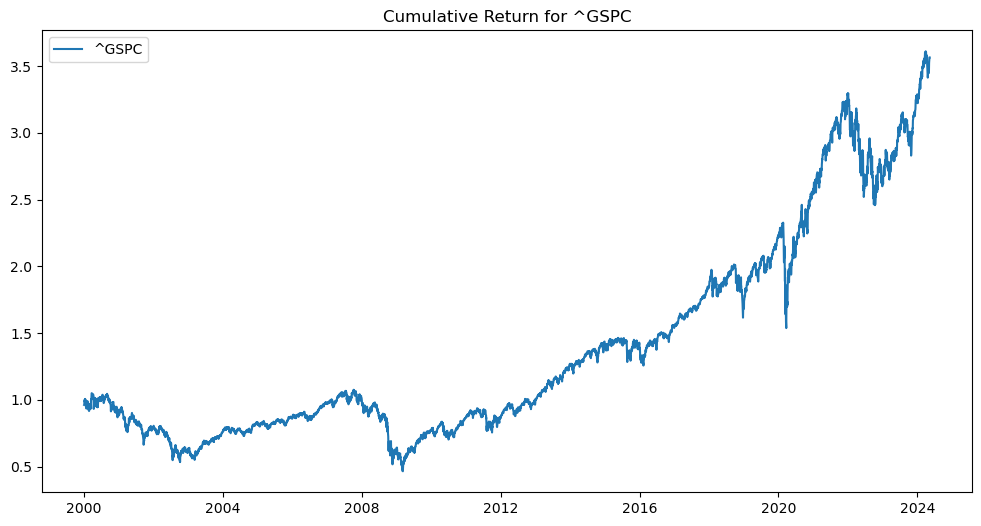

[*********************100%%**********************]  1 of 1 completed


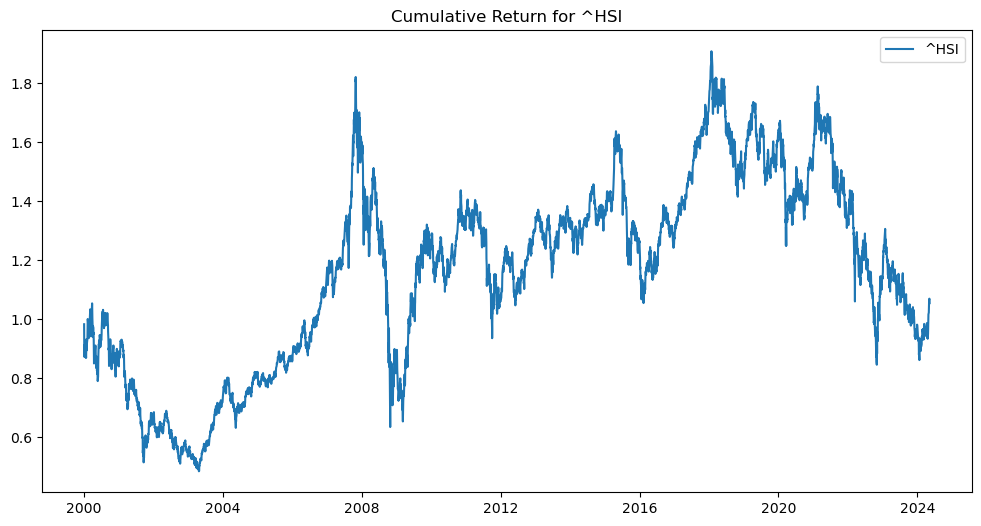

[*********************100%%**********************]  1 of 1 completed


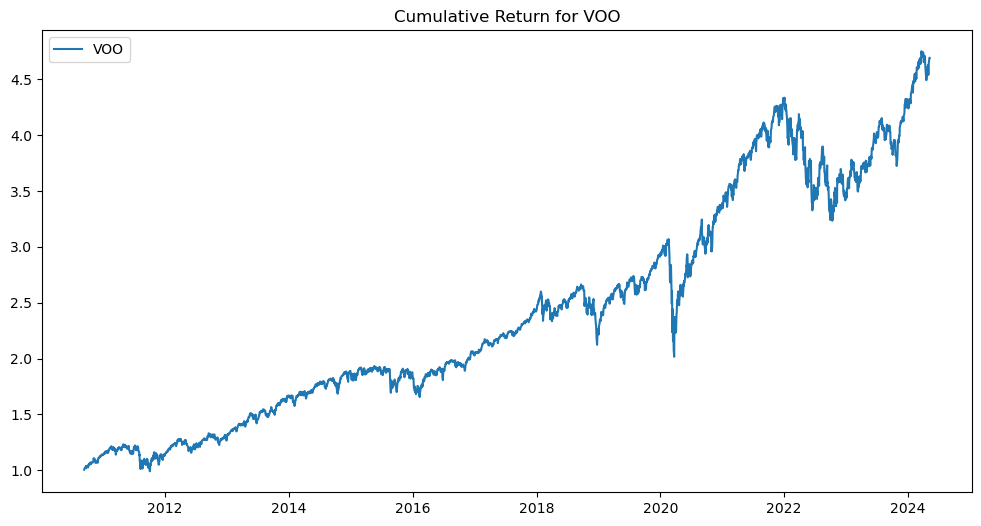

[*********************100%%**********************]  1 of 1 completed


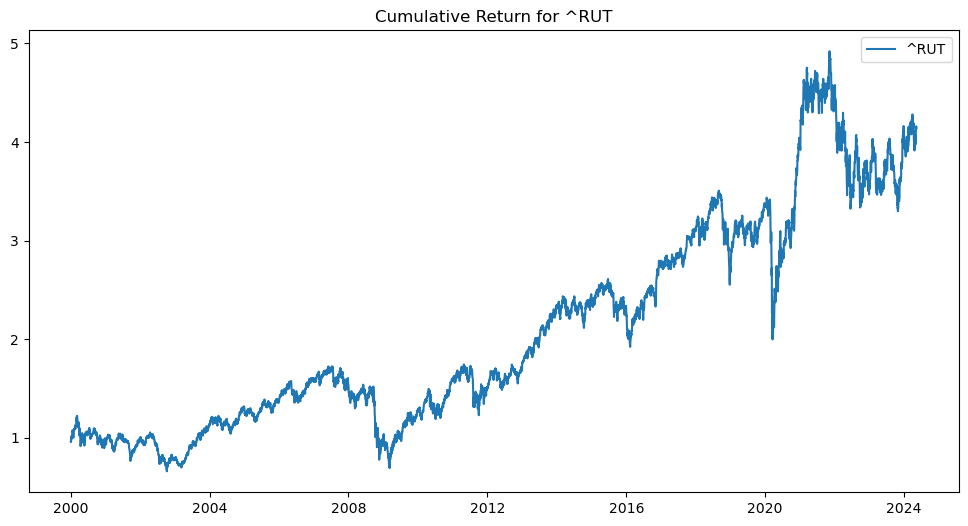

[*********************100%%**********************]  1 of 1 completed


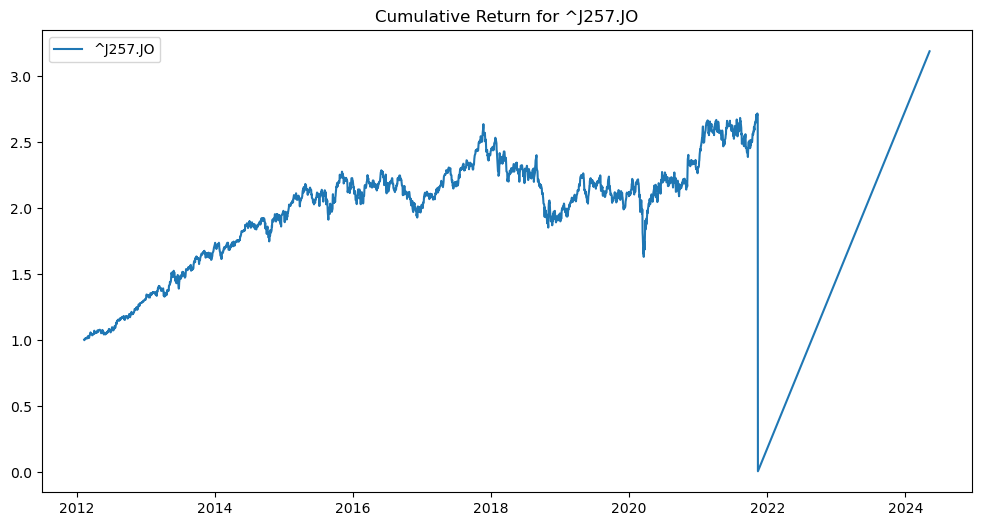

[*********************100%%**********************]  1 of 1 completed


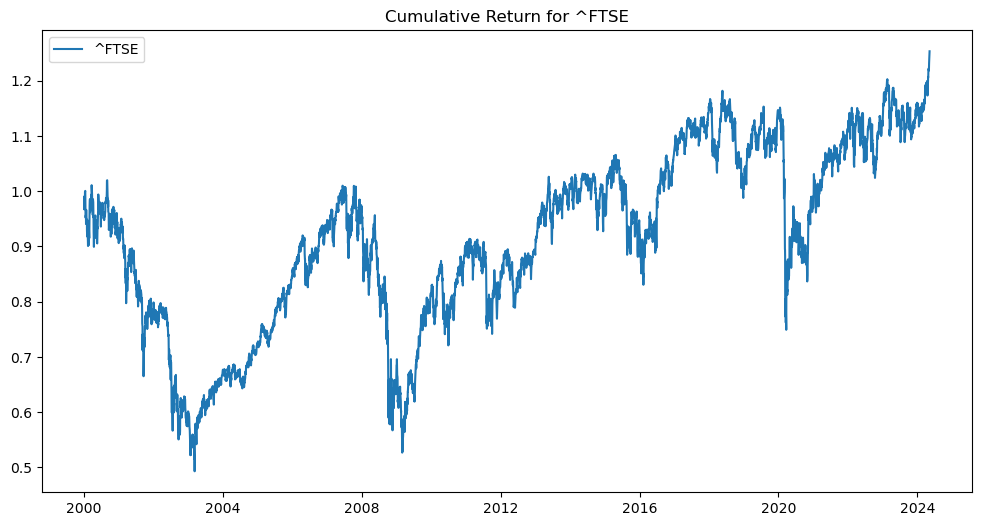

[*********************100%%**********************]  1 of 1 completed


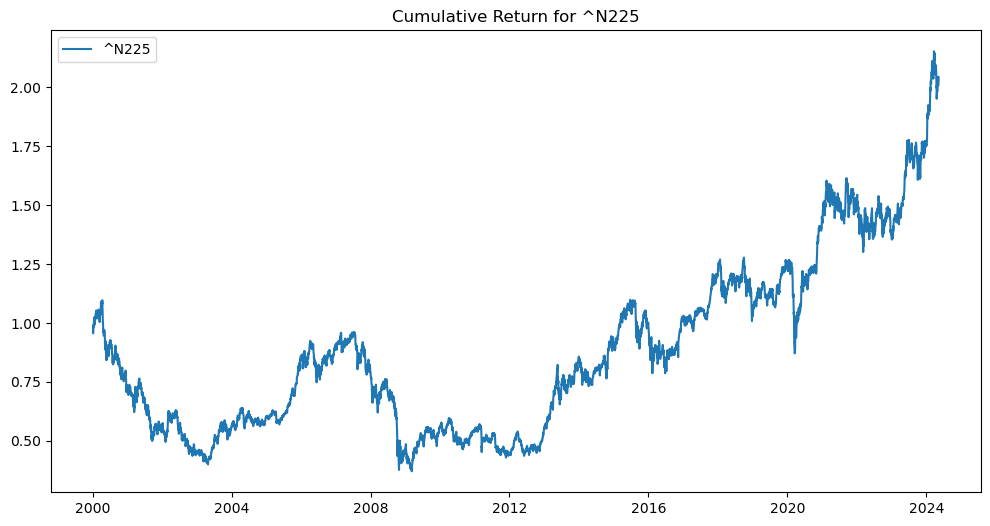

The 3 best investments based on the lowest mean squared error are:
1. VOO from 2024-01-01 to 2024-12-31
2. ^FTSE from 2024-01-01 to 2024-12-31
3. ^GSPC from 2024-01-01 to 2024-12-31


In [5]:
# Main function
def main():
    mse_values = {}

    for symbol in symbols:
        data = get_data(symbol)
        # print(data.head())
        data = analyze_data(data)
        visualize_data(data, symbol)
        mse = recommend_investment(data, symbol)
        mse_values[symbol] = mse

    best_investments = sorted(mse_values, key=mse_values.get)[:3]
    print("The 3 best investments based on the lowest mean squared error are:")
    for i, symbol in enumerate(best_investments):
        print(f"{i+1}. {symbol} from 2024-01-01 to 2024-12-31")

# Run the main function
main()

# Predictions

[*********************100%%**********************]  1 of 1 completed


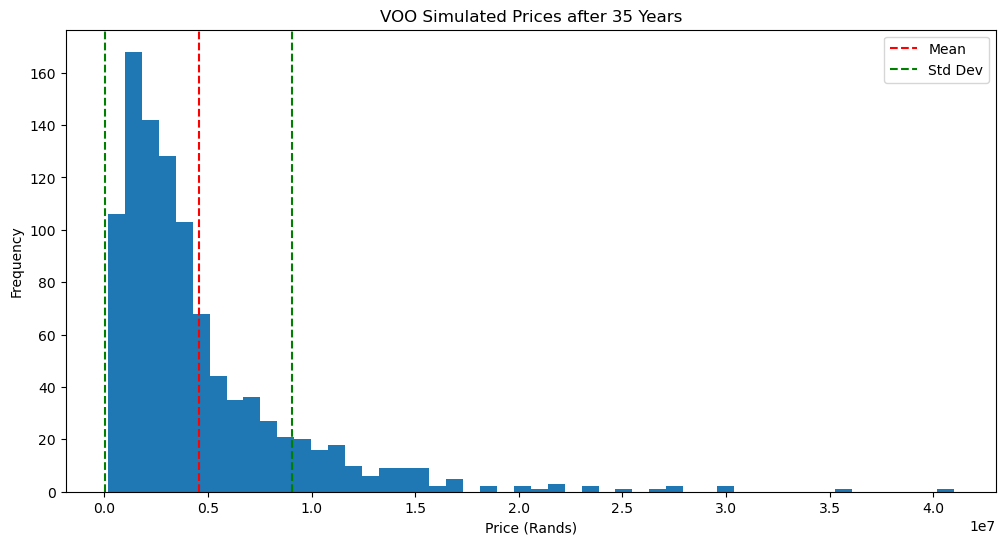

Investment amount: R40000
Investment period: 35 years
Current price: R9869.72
Mean simulated price: R4559117.15
Standard deviation of simulated prices: R4503635.58
Future price in 40 years: R94647272.13
Investment amount in 35 years: R4845812.42


In [6]:
# Set the investment amount in Rands
investment_amount_rands = 40000

# Define the number of simulations
num_simulations = 1000

# Define the investment period in years
investment_period = 35

# Get the historical data for FTSE
symbol = "VOO"
data = yf.download(symbol, start='1980-01-01', end='2024-05-10')

# Get the current price in pounds
current_price_pounds = data['Adj Close'][-1]

# Convert the current price to Rands
gbp_to_zar = 20.76  # exchange rate on 2023-05-08
current_price_rands = current_price_pounds * gbp_to_zar

# Calculate the daily returns
returns = data['Adj Close'].pct_change()

# Calculate the mean and standard deviation of the daily returns
mu = returns.mean()
sigma = returns.std()

# Calculate the annualized mean and standard deviation
mu_annual = mu * 252
sigma_annual = sigma * np.sqrt(252)

# Define the simulation function
def simulate_returns(investment_amount, mu, sigma, investment_period):
    returns = np.random.normal(mu, sigma, investment_period)
    prices = investment_amount * (1 + returns).cumprod()
    return prices[-1]

# Run the simulations
simulated_prices = []
for i in range(num_simulations):
    simulated_price = simulate_returns(investment_amount_rands, mu_annual, sigma_annual, investment_period)
    simulated_prices.append(simulated_price)

# Calculate the mean and standard deviation of the simulated prices
mean_price_rands = np.mean(simulated_prices)
std_price_rands = np.std(simulated_prices)

# Calculate the future price in Rands
future_price_rands = mean_price_rands * gbp_to_zar

# Calculate the investment amount in 35 years
investment_amount_35_years_rands = investment_amount_rands * (1 + mu_annual)**35

# Plot the results
plt.figure(figsize=(12,6))
plt.hist(simulated_prices, bins=50)
plt.axvline(x=mean_price_rands, color='r', linestyle='--', label='Mean')
plt.axvline(x=mean_price_rands-std_price_rands, color='g', linestyle='--', label='Std Dev')
plt.axvline(x=mean_price_rands+std_price_rands, color='g', linestyle='--')
plt.title('VOO Simulated Prices after {} Years'.format(investment_period))
plt.xlabel('Price (Rands)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print the results
print('Investment amount: R{}'.format(investment_amount_rands))
print('Investment period: {} years'.format(investment_period))
print('Current price: R{}'.format(round(current_price_rands, 2)))
print('Mean simulated price: R{}'.format(round(mean_price_rands, 2)))
print('Standard deviation of simulated prices: R{}'.format(round(std_price_rands, 2)))
print('Future price in 40 years: R{}'.format(round(future_price_rands, 2)))
print('Investment amount in 35 years: R{}'.format(round(investment_amount_35_years_rands, 2)))

[*********************100%%**********************]  1 of 1 completed


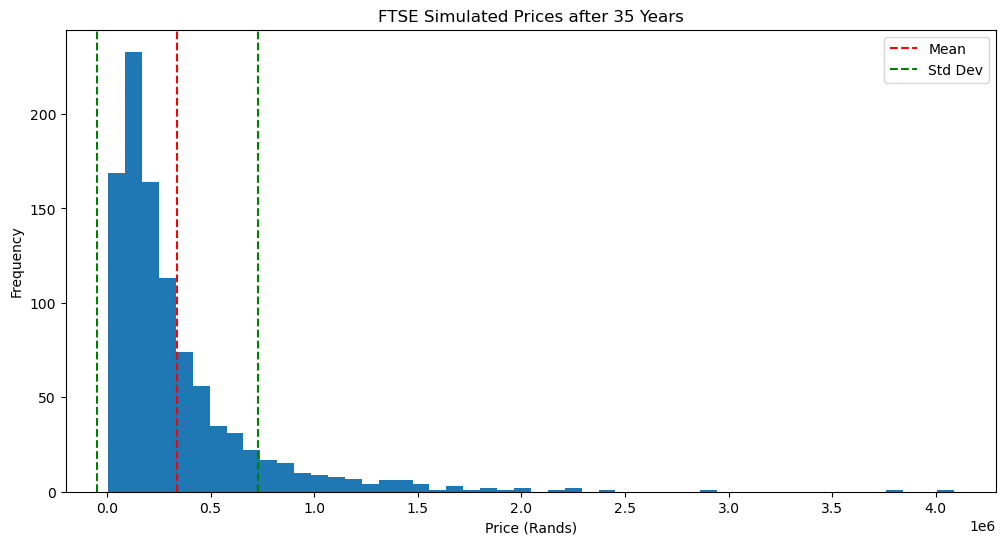

Investment amount: R35000
Investment period: 35 years
Current price: R172592.42
Mean simulated price: R338131.83
Standard deviation of simulated prices: R388835.14
Future price in 40 years: R7019616.76
Investment amount in 35 years: R342371.36


In [7]:
# Set the investment amount in Rands
investment_amount_rands = 35000

# Define the number of simulations
num_simulations = 1000

# Define the investment period in years
investment_period = 35

# Get the historical data for FTSE
symbol = "^FTSE"
data = yf.download(symbol, start='1980-01-01', end='2024-05-08')

# Get the current price in pounds
current_price_pounds = data['Adj Close'][-1]

# Convert the current price to Rands
gbp_to_zar = 20.76  # exchange rate on 2023-05-08
current_price_rands = current_price_pounds * gbp_to_zar

# Calculate the daily returns
returns = data['Adj Close'].pct_change()

# Calculate the mean and standard deviation of the daily returns
mu = returns.mean()
sigma = returns.std()

# Calculate the annualized mean and standard deviation
mu_annual = mu * 252
sigma_annual = sigma * np.sqrt(252)

# Define the simulation function
def simulate_returns(investment_amount, mu, sigma, investment_period):
    returns = np.random.normal(mu, sigma, investment_period)
    prices = investment_amount * (1 + returns).cumprod()
    return prices[-1]

# Run the simulations
simulated_prices = []
for i in range(num_simulations):
    simulated_price = simulate_returns(investment_amount_rands, mu_annual, sigma_annual, investment_period)
    simulated_prices.append(simulated_price)

# Calculate the mean and standard deviation of the simulated prices
mean_price_rands = np.mean(simulated_prices)
std_price_rands = np.std(simulated_prices)

# Calculate the future price in Rands
future_price_rands = mean_price_rands * gbp_to_zar

# Calculate the investment amount in 35 years
investment_amount_35_years_rands = investment_amount_rands * (1 + mu_annual)**35

# Plot the results
plt.figure(figsize=(12,6))
plt.hist(simulated_prices, bins=50)
plt.axvline(x=mean_price_rands, color='r', linestyle='--', label='Mean')
plt.axvline(x=mean_price_rands-std_price_rands, color='g', linestyle='--', label='Std Dev')
plt.axvline(x=mean_price_rands+std_price_rands, color='g', linestyle='--')
plt.title('FTSE Simulated Prices after {} Years'.format(investment_period))
plt.xlabel('Price (Rands)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print the results
print('Investment amount: R{}'.format(investment_amount_rands))
print('Investment period: {} years'.format(investment_period))
print('Current price: R{}'.format(round(current_price_rands, 2)))
print('Mean simulated price: R{}'.format(round(mean_price_rands, 2)))
print('Standard deviation of simulated prices: R{}'.format(round(std_price_rands, 2)))
print('Future price in 40 years: R{}'.format(round(future_price_rands, 2)))
print('Investment amount in 35 years: R{}'.format(round(investment_amount_35_years_rands, 2)))

[*********************100%%**********************]  1 of 1 completed


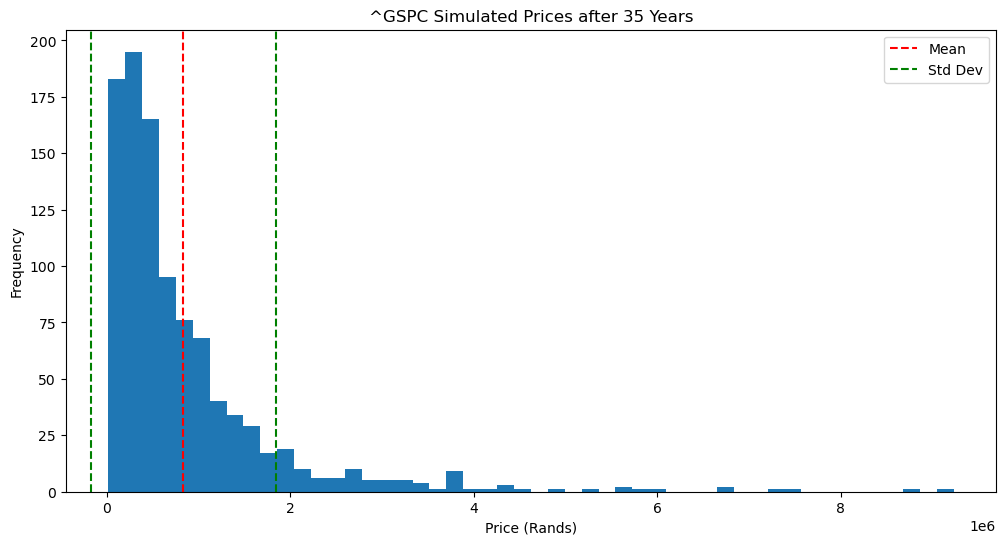

Investment amount: R25000
Investment period: 35 years
Current price: R107696.66
Mean simulated price: R837482.45
Standard deviation of simulated prices: R1005711.32
Future price in 40 years: R17386135.66
Investment amount in 35 years: R794492.83


In [8]:
# Set the investment amount in Rands
investment_amount_rands = 25000

# Define the number of simulations
num_simulations = 1000

# Define the investment period in years
investment_period = 35

# Get the historical data for FTSE
symbol = "^GSPC"
data = yf.download(symbol, start='1980-01-01', end='2024-05-08')

# Get the current price in pounds
current_price_pounds = data['Adj Close'][-1]

# Convert the current price to Rands
gbp_to_zar = 20.76  # exchange rate on 2024-05-08
current_price_rands = current_price_pounds * gbp_to_zar

# Calculate the daily returns
returns = data['Adj Close'].pct_change()

# Calculate the mean and standard deviation of the daily returns
mu = returns.mean()
sigma = returns.std()

# Calculate the annualized mean and standard deviation
mu_annual = mu * 252
sigma_annual = sigma * np.sqrt(252)

# Define the simulation function
def simulate_returns(investment_amount, mu, sigma, investment_period):
    returns = np.random.normal(mu, sigma, investment_period)
    prices = investment_amount * (1 + returns).cumprod()
    return prices[-1]

# Run the simulations
simulated_prices = []
for i in range(num_simulations):
    simulated_price = simulate_returns(investment_amount_rands, mu_annual, sigma_annual, investment_period)
    simulated_prices.append(simulated_price)

# Calculate the mean and standard deviation of the simulated prices
mean_price_rands = np.mean(simulated_prices)
std_price_rands = np.std(simulated_prices)

# Calculate the future price in Rands
future_price_rands = mean_price_rands * gbp_to_zar

# Calculate the investment amount in 35 years
investment_amount_35_years_rands = investment_amount_rands * (1 + mu_annual)**35

# Plot the results
plt.figure(figsize=(12,6))
plt.hist(simulated_prices, bins=50)
plt.axvline(x=mean_price_rands, color='r', linestyle='--', label='Mean')
plt.axvline(x=mean_price_rands-std_price_rands, color='g', linestyle='--', label='Std Dev')
plt.axvline(x=mean_price_rands+std_price_rands, color='g', linestyle='--')
plt.title('^GSPC Simulated Prices after {} Years'.format(investment_period))
plt.xlabel('Price (Rands)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print the results
print('Investment amount: R{}'.format(investment_amount_rands))
print('Investment period: {} years'.format(investment_period))
print('Current price: R{}'.format(round(current_price_rands, 2)))
print('Mean simulated price: R{}'.format(round(mean_price_rands, 2)))
print('Standard deviation of simulated prices: R{}'.format(round(std_price_rands, 2)))
print('Future price in 40 years: R{}'.format(round(future_price_rands, 2)))
print('Investment amount in 35 years: R{}'.format(round(investment_amount_35_years_rands, 2)))

In [9]:
data_GSPC = yf.download('VOO', start='2000-01-01')

[*********************100%%**********************]  1 of 1 completed


In [10]:
data_GSPC.describe

<bound method NDFrame.describe of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-09-09  102.500000  102.500000  101.139999  101.320000   78.490944   
2010-09-10  101.680000  101.860001  101.300003  101.779999   78.847313   
2010-09-13  102.959999  103.139999  102.500000  103.059998   79.838875   
2010-09-14  102.839996  103.480003  102.379997  103.040001   79.823387   
2010-09-15  102.620003  103.379997  102.400002  103.300003   80.024841   
...                ...         ...         ...         ...         ...   
2024-05-02  463.359985  464.950012  459.160004  464.220001  464.220001   
2024-05-03  469.760010  471.000000  467.440002  469.980011  469.980011   
2024-05-06  472.220001  474.809998  471.820007  474.720001  474.720001   
2024-05-07  475.700012  476.640015  474.709991  475.399994  475.399994   
2024-05-08  473.589996  475.859985  473.515015  475.420013  475.420013   

   

In [11]:
# For Vanguard S&P 500 (VOO)
data_FTSE = yf.download('^FTSE', start='2000-01-01')

[*********************100%%**********************]  1 of 1 completed


In [12]:
data_FTSE.describe

<bound method NDFrame.describe of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-04  6930.200195  6930.200195  6662.899902  6665.899902  6665.899902   
2000-01-05  6665.899902  6665.899902  6500.399902  6535.899902  6535.899902   
2000-01-06  6535.899902  6547.299805  6424.399902  6447.200195  6447.200195   
2000-01-07  6447.200195  6532.399902  6438.799805  6504.799805  6504.799805   
2000-01-10  6504.799805  6634.200195  6504.799805  6607.700195  6607.700195   
...                 ...          ...          ...          ...          ...   
2024-05-01  8144.100098  8179.000000  8111.399902  8121.200195  8121.200195   
2024-05-02  8121.200195  8178.799805  8119.899902  8172.200195  8172.200195   
2024-05-03  8172.200195  8248.700195  8172.200195  8213.500000  8213.500000   
2024-05-07  8213.500000  8335.700195  8213.500000  8313.700195  8313.700195   
2024-05-08  8313.6

In [13]:
# For Vanguard S&P 500 (VOO)
data_voo = yf.download('VOO', start='2000-01-01')

[*********************100%%**********************]  1 of 1 completed


In [14]:
data_voo.describe

<bound method NDFrame.describe of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-09-09  102.500000  102.500000  101.139999  101.320000   78.490959   
2010-09-10  101.680000  101.860001  101.300003  101.779999   78.847305   
2010-09-13  102.959999  103.139999  102.500000  103.059998   79.838913   
2010-09-14  102.839996  103.480003  102.379997  103.040001   79.823387   
2010-09-15  102.620003  103.379997  102.400002  103.300003   80.024857   
...                ...         ...         ...         ...         ...   
2024-05-02  463.359985  464.950012  459.160004  464.220001  464.220001   
2024-05-03  469.760010  471.000000  467.440002  469.980011  469.980011   
2024-05-06  472.220001  474.809998  471.820007  474.720001  474.720001   
2024-05-07  475.700012  476.640015  474.709991  475.399994  475.399994   
2024-05-08  473.589996  475.859985  473.515015  475.420013  475.420013   

   

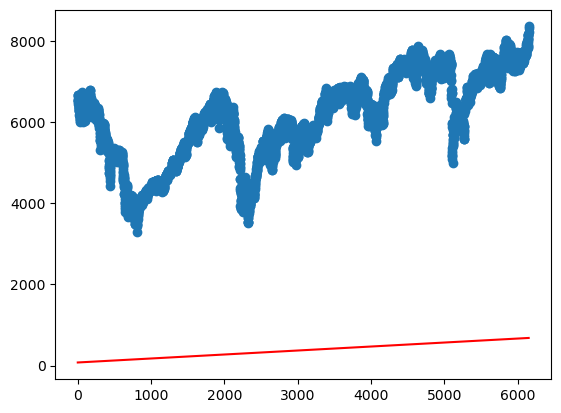

In [15]:
reg = LinearRegression()
reg.fit(np.array(range(len(data_voo))).reshape(-1, 1), data_voo['Close'])

plt.scatter(range(len(data_FTSE)), data_FTSE['Close'])
plt.plot(range(len(data_FTSE)), reg.predict(np.array(range(len(data_FTSE))).reshape(-1, 1)), color='red')
plt.show()

# Similarly, do for other ETFs 

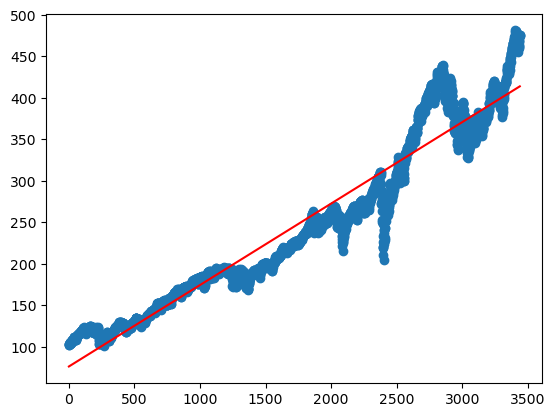

In [16]:
reg = LinearRegression()
reg.fit(np.array(range(len(data_GSPC))).reshape(-1, 1), data_GSPC['Close'])

plt.scatter(range(len(data_GSPC)), data_GSPC['Close'])
plt.plot(range(len(data_GSPC)), reg.predict(np.array(range(len(data_GSPC))).reshape(-1, 1)), color='red')
plt.show()

# Similarly, do for other ETFs

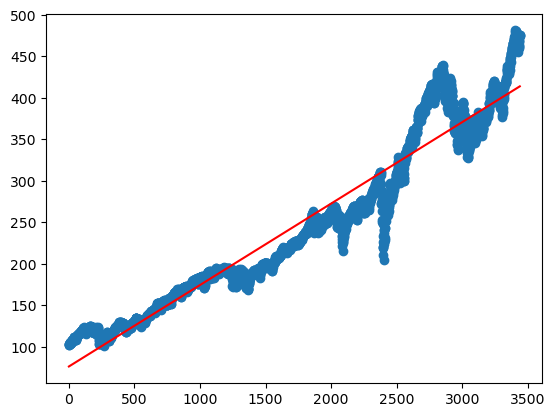

In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np

reg = LinearRegression()
reg.fit(np.array(range(len(data_voo))).reshape(-1, 1), data_voo['Close'])

plt.scatter(range(len(data_voo)), data_voo['Close'])
plt.plot(range(len(data_voo)), reg.predict(np.array(range(len(data_voo))).reshape(-1, 1)), color='red')
plt.show()

# Similarly, do for other ETFs

# Assignment 3

### Authored by : 
### Israel Lwamba (220069129)
### David K Tambwe (219022649)
### Reabetswe M. Malatji (221035173)
### Date: 08 May 2024
### Source: Yahoo Finance
### GitHub url: 

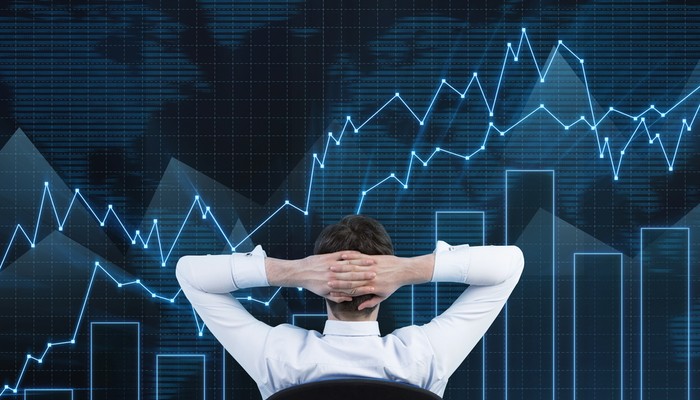